## Student Performance Exploratory Data Analysis Project

## Project Overview

### The objective of this project is to analyze and visualize student performance data to uncover patterns and insights that can help improve educational outcomes. The analysis involves exploring various factors that may influence student performance, such as demographic characteristics, academic history, and socio-economic status.

## Dataset

### The dataset contains records of students, including features such as:
 - Demographics: Age, gender, parental education level, etc.
 - Academic Records: Grades in various subjects, attendance, participation in extracurricular activities, etc.
 - Socio-Economic Factors: Family income, access to learning resources, etc.

## Steps Involved
 1. Data Collection: Import the dataset using libraries like pandas.
 2. Data Cleaning: Handle missing values, outliers, and ensure data types are correct.
 3. Data Exploration: Use descriptive statistics and visualizations to understand the distribution of data and identify any patterns or anomalies.
 4. Feature Engineering: Create new features that may better capture the influences on student performance.
 5. Data Visualization: Use libraries like matplotlib and seaborn to create plots that illustrate key findings.
 6. Correlation Analysis: Identify relationships between different variables and student performance.
 7. Insights and Recommendations: Summarize the findings and provide actionable insights that could help educators and policymakers.

### Tools and Libraries
 - Python: Primary programming language for analysis.
 - Pandas: For data manipulation and analysis.
 - Matplotlib and Seaborn: For data visualization.


### Expected Outcomes
 - By the end of the project, you will have a comprehensive understanding of the factors influencing student performance. The visualizations and statistical analyses will provide insights that can be used to inform educational strategies and policies aimed at improving student outcomes.

In [30]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import offline, iplot


pd.options.display.float_format = "{:,.1f}".format


def update_layout(title_font_size = 28, hover_font_size = 16, hover_bgcolor = "#45FFCA", showlegend = False):
    fig.update_layout(
        showlegend = showlegend,
        title = {
            "font" : {
                "size" :title_font_size,
                "family" :"tahoma"
            }
        },
        hoverlabel={
            "bgcolor": hover_bgcolor,
            "font_size": hover_font_size,
            "font_family": "tahoma"
        }
    )

# Now we need to read in the data
df = pd.read_csv('StudentsPerformance.csv')

 ### Data cleaning

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [33]:
df.describe()

,math score,reading score,writing score
count,"1,000.0","1,000.0","1,000.0"
mean,66.1,69.2,68.1
std,15.2,14.6,15.2
min,0.0,17.0,10.0
25%,57.0,59.0,57.8
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


In [34]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [35]:
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


## Exploratory data analysis

### Gender of students

In [36]:
gender = df["gender"].value_counts()
(gender / df.shape[0] * 100).apply(lambda x: f"{x: 0.2f} %")

gender
female     51.80 %
male       48.20 %
Name: count, dtype: object

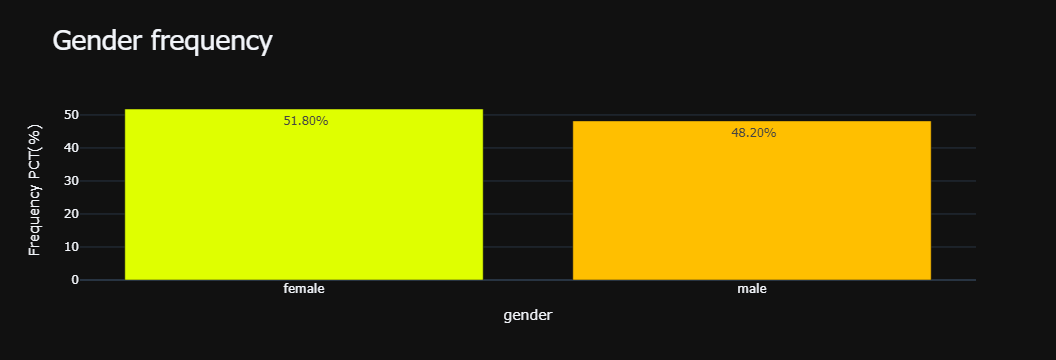

In [37]:
gender = gender[0:6]
fig = px.bar(data_frame= gender, 
       x = gender.index, 
       y = gender / sum(rating) * 100,
       color=rating.index,
       color_discrete_sequence=["#DFFF00", "#FFBF00", "#FF7F50", "#DE3163", "#9FE2BF", "#40E0D0"],
       labels = {"index": "Gender frequency", "y" : "Frequency PCT(%)"},
       title = "Gender frequency",
       text = rating.apply(lambda x: f"{x / sum(rating) * 100: 0.2f}%"),
       template = "plotly_dark",
      )


update_layout(hover_bgcolor="#111")


fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "Gender: %{label}<br>Popularity: %{value:0.2f}%"
)
iplot(fig)

## Parental level of education

In [38]:
parental_level_of_education = df["parental level of education"].value_counts()
(parental_level_of_education / df.shape[0] * 100).apply(lambda x: f"{x: 0.2f} %")

parental level of education
some college           22.60 %
associate's degree     22.20 %
high school            19.60 %
some high school       17.90 %
bachelor's degree      11.80 %
master's degree         5.90 %
Name: count, dtype: object

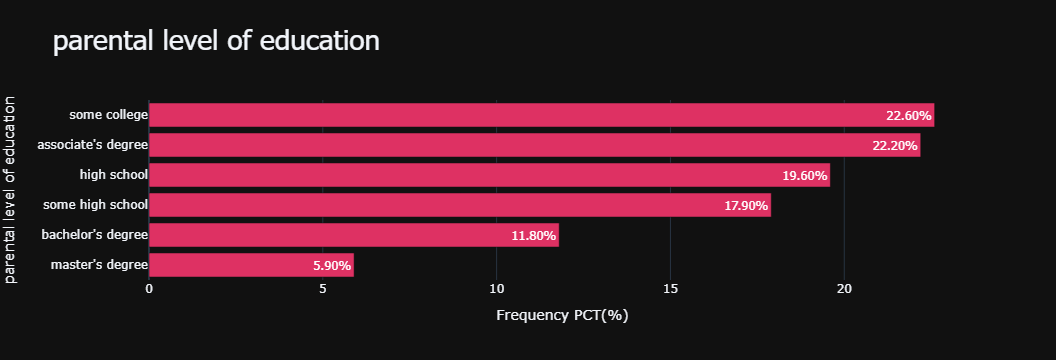

In [39]:
parental_level_of_education = parental_level_of_education.nlargest(10)[::-1]
fig = px.bar(data_frame= parental_level_of_education, 
             orientation = "h",
       x = parental_level_of_education / sum(parental_level_of_education) * 100,
             
       y = parental_level_of_education.index, 
       color_discrete_sequence=["#DE3163"],
       labels = {"index": "Movie Genre", "x" : "Frequency PCT(%)"},
       title = "parental level of education",
       text = parental_level_of_education.apply(lambda x: f"{x / sum(parental_level_of_education) * 100: 0.2f}%"),
       template = "plotly_dark",
      )

fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "parental_level_of_education: %{label}<br>Popularity: %{value:0.2f}%"
)

update_layout()

iplot(fig)

### Distirbution of Math scores

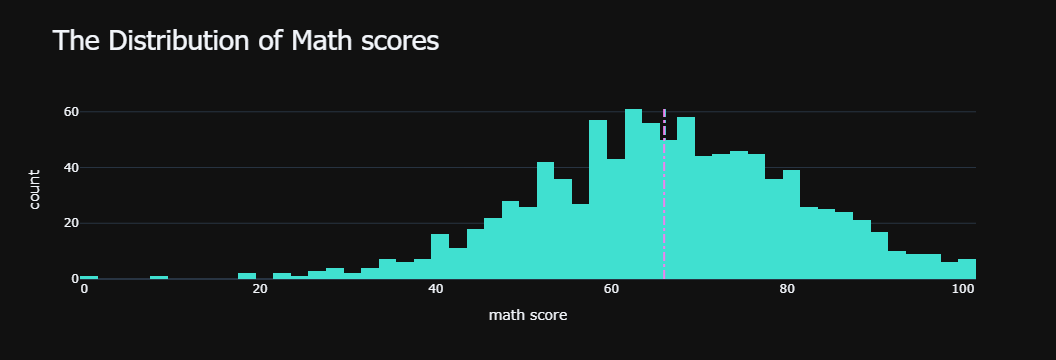

In [44]:
fig = px.histogram(df["math score"], 
                   template = "plotly_dark",
                   color_discrete_sequence=["#40E0D0"],
                   labels={"value" :"math score", "count" :"Frequency"},
                   title = "The Distribution of Math scores",
                  )
## ► Adding The Mean Line To The Histogram
fig.add_shape(type='line',
              x0=df["math score"].mean(),
              y0=0,
              x1=df["math score"].mean(),
              y1=df["math score"].value_counts().max()+25,
              line = {
                  "color" :"#40E0D0",
                  "width" : 2,
                  "dash" : "dashdot"
              },
              label={
                  "text" : f"Mean: {df['math score'].mean(): 0.1f}\t",
                  "textposition": "end",
                  "yanchor" :"top",
                  "xanchor" :"right",
                  "textangle" :0,
                  "font": {
                      "size": 14,
                      "color" :"#9FE2BF",
                      "family" : "tahoma"
                      
                  },
              }
             )
## ► Adding The Median Line To The Histogram
fig.add_shape(type='line',
              x0=df["math score"].median(),
              y0=0,
              x1=df["math score"].median(),
              y1=df["math score"].value_counts().max()+25,
              line = {
                  "color" :"violet",
                  "width" : 2,
                  "dash" : "dashdot"
              },
              label={
                  "text" :f"Median: {df['math score'].median(): 0.1f}",
                  "textposition": "end",
                  "yanchor" :"top",
                  "xanchor" :"left",
                  "textangle" :0,
                  "font": {
                      "size": 14,
                      "color" :"violet",
                      "family" : "tahoma"
                      
                  },
              }
             )
update_layout()

iplot(fig)

### Any outliers in the math scores?

 - Yes, there is one or two students who scored zero

<Axes: >

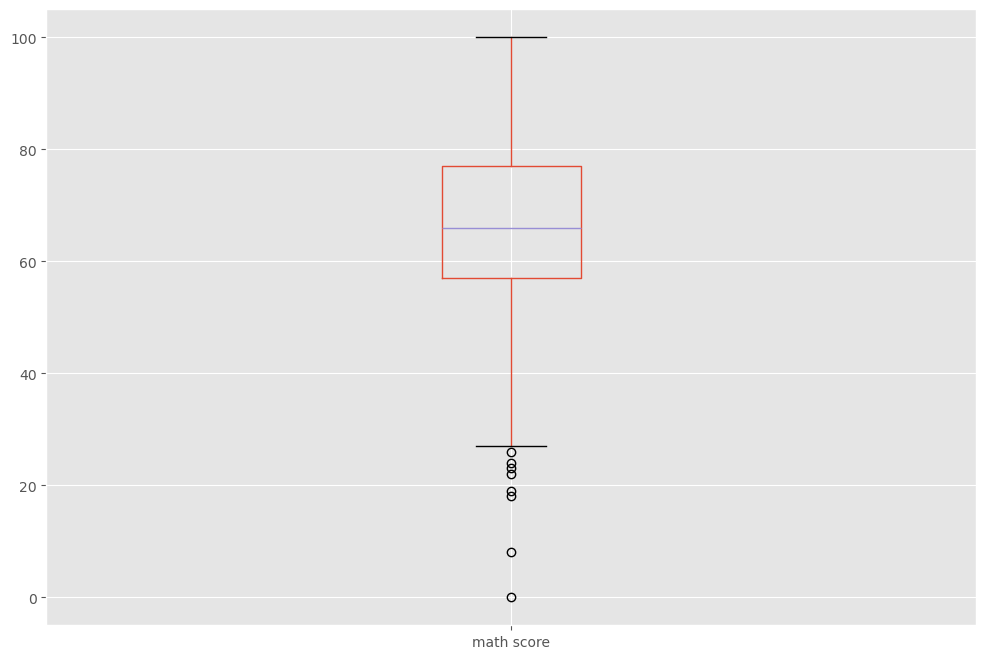

In [45]:

df.boxplot(column=['math score'])

### Is there a relationship between parents level of education and students scores?

- Given that 'parents level of education' is a categorical variable, a scatter plot correlation is not appropriate when it comes ot determining the relationship between these two
- Therefore, a box-and-whisker plot will provide insight into the distrirbution of math scores for  the different levels of education

#### The visualisation below shows that there is no significant difference in scores between the different levels of education. This is to say that parents level of education does not necessarily lead to a child having higher math scores

<Axes: xlabel='parental level of education', ylabel='math score'>

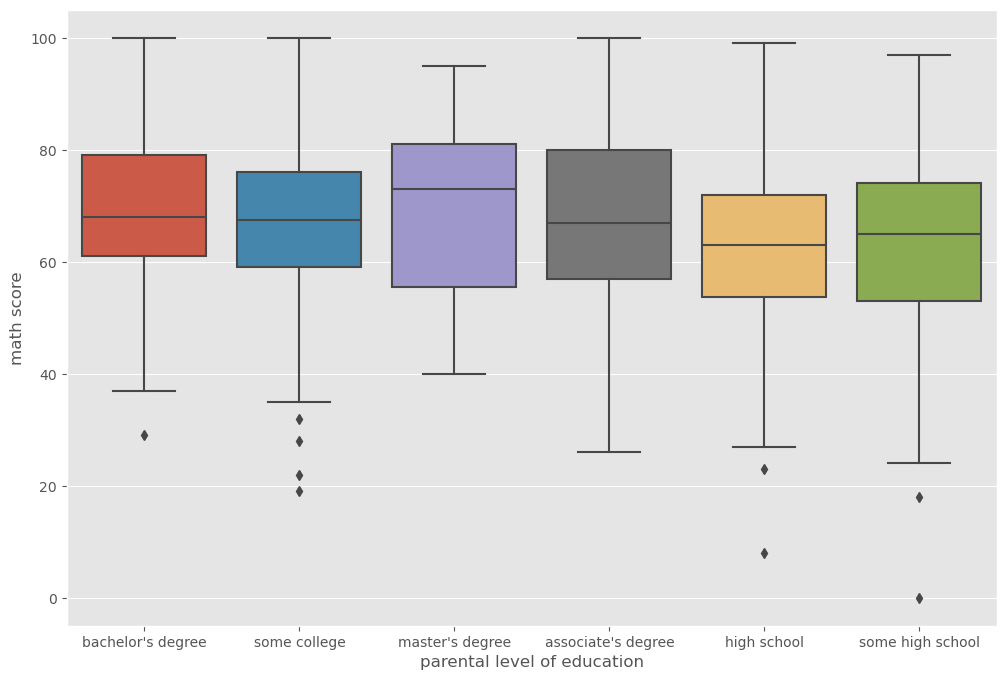

In [47]:
sns.boxplot(x="parental level of education", y="math score", data=df)

### Is there a relationship between parents level of education and students scores?

#### The visualisation below shows that there is no significant difference in scores between the different genders. From this box-and-whisker, we can see that males have slightly higher scores, but it is not significant enough. This is to say that gender does not necessarily lead to a child having higher math scores

<Axes: xlabel='gender', ylabel='math score'>

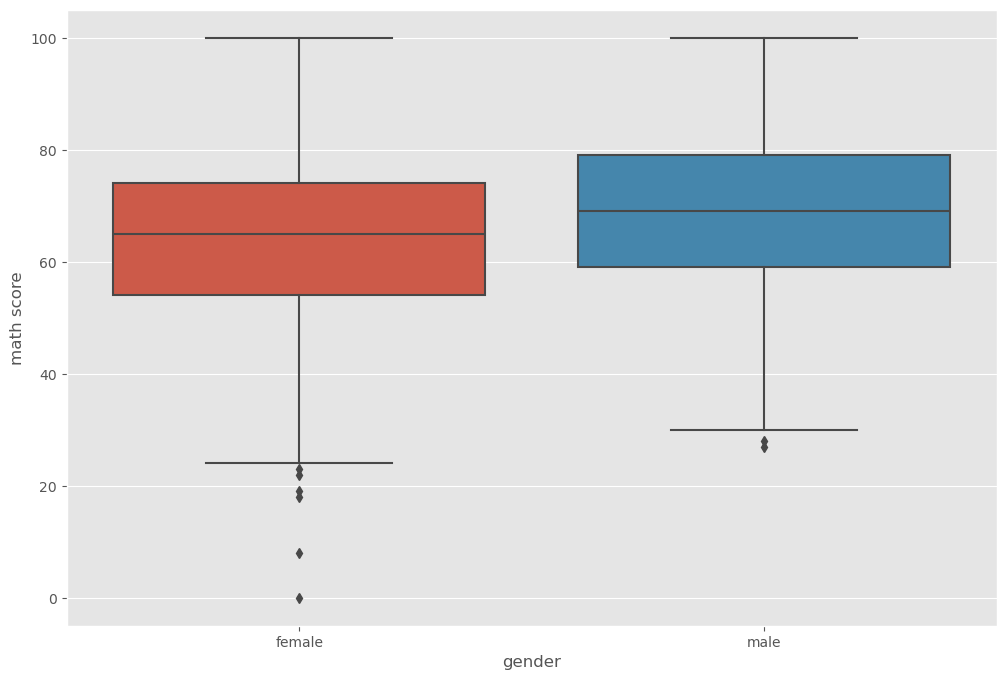

In [48]:
sns.boxplot(x="gender", y="math score", data=df)

### Race/ Ethinicity

- Race/Ethnicty is an interesting variable to compare to student performance
- For some reason, the ethnicities have not been disclosed but nonetheless, this variable can still be explored 

In [56]:
Race_and_ethnicity = df["race/ethnicity"].value_counts()
(Race_and_ethnicity / df.shape[0] * 100).apply(lambda x: f"{x: 0.2f} %")

race/ethnicity
group C     31.90 %
group D     26.20 %
group B     19.00 %
group E     14.00 %
group A      8.90 %
Name: count, dtype: object

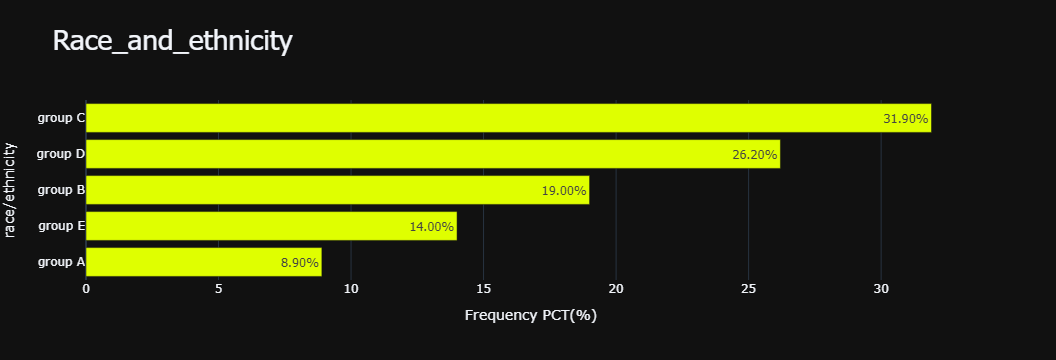

In [59]:
Race_and_ethnicity = Race_and_ethnicity.nlargest(10)[::-1]
fig = px.bar(data_frame= Race_and_ethnicity, 
             orientation = "h",
       x = Race_and_ethnicity / sum(Race_and_ethnicity) * 100,
             
       y = Race_and_ethnicity.index, 
       color_discrete_sequence=["#DFFF00"],
       labels = {"index": "Movie Genre", "x" : "Frequency PCT(%)"},
       title = "Race_and_ethnicity",
       text = Race_and_ethnicity.apply(lambda x: f"{x / sum(Race_and_ethnicity) * 100: 0.2f}%"),
       template = "plotly_dark",
      )

fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "Race_and_ethnicity: %{label}<br>Popularity: %{value:0.2f}%"
)

update_layout()

iplot(fig)

### Is there a relationship between Race/ethnicity and math scores?

 - Theres is not signigicant difference in race and math scores however, one can almost say that group E has higher math scores

<Axes: xlabel='race/ethnicity', ylabel='math score'>

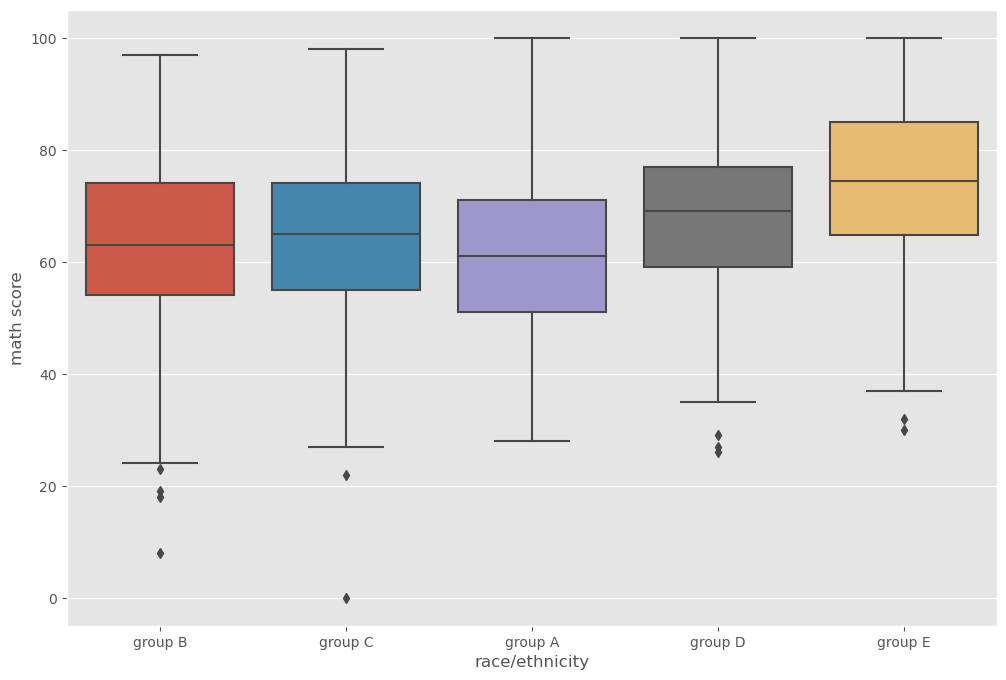

In [61]:
sns.boxplot(x="race/ethnicity", y="math score", data=df)

### Test Preperation

- As shown below, it seems that most students had no test preperation

In [63]:
test_preperation = df["test preparation course"].value_counts()
(test_preperation / df.shape[0] * 100).apply(lambda x: f"{x: 0.2f} %")

test preparation course
none          64.20 %
completed     35.80 %
Name: count, dtype: object

### Is there a relationship between test preperation and math scores?

 - We can see that those who ddid their test prepration have lsightly higher scores
 - However, the there is still no significant overlap

<Axes: xlabel='test preparation course', ylabel='math score'>

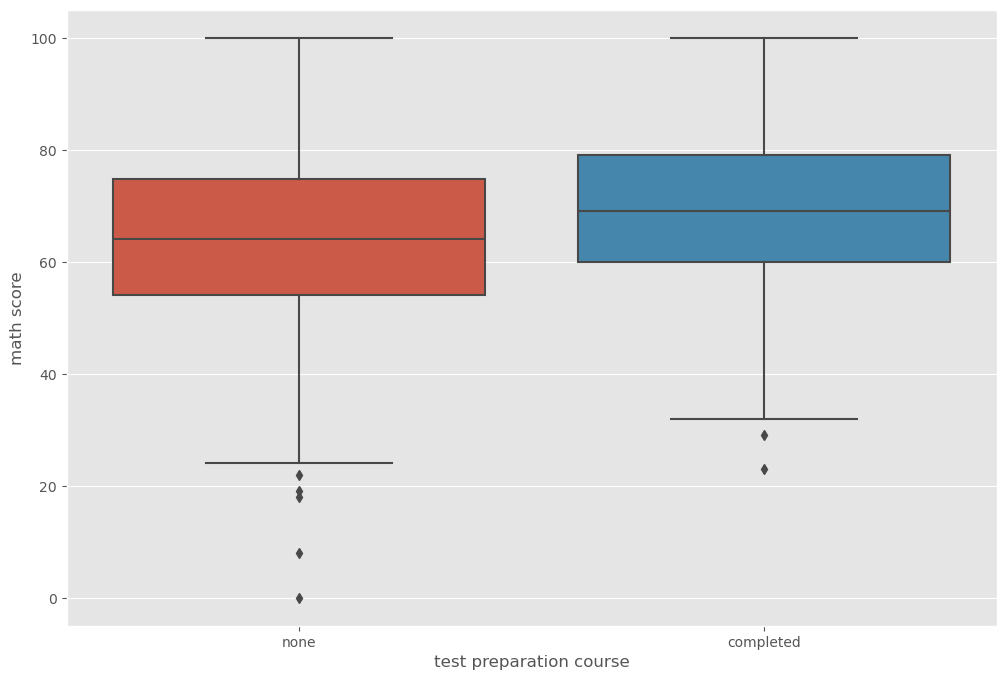

In [65]:
sns.boxplot(x="test preparation course", y="math score", data=df)